# Content of the Notebook

    0. Importing Libraries


    1. Importing Data


    2. Data Consistency Checks and Cleaning

        2.a. Checking for missing values
    
        2.b. Checking for duplicates
    
        2.c. Checking for mixed-type data and converting data types
    
        2.d. Checking for Outliers
        
    

    3. Exploratory Analysis


    4. Exporting the Data Frame


 # 0. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Importing Data

In [5]:
#Import the dataframe
df = pd.read_csv('/Users/buketoztekin/Documents/salaries.csv')

In [6]:
# Check the dataset is correctly loaded
print(df.head())
print(df.info())
df.shape

   work_year experience_level employment_type           job_title  salary  \
0       2024               MI              FT  Analytics Engineer   77500   
1       2024               SE              FT        AI Developer  252000   
2       2024               SE              FT        AI Developer  168000   
3       2024               MI              FT      Data Scientist  199500   
4       2024               MI              FT      Data Scientist   86700   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             CAD          59615                 CA           100   
1             USD         252000                 US             0   
2             USD         168000                 US             0   
3             USD         199500                 US           100   
4             USD          86700                 US           100   

  company_location company_size  
0               CA            S  
1               US            M  
2               US  

(18056, 11)

# 2. Data Consistency Checks and Cleaning

## 2.a. Checking for Missing Values


In [7]:
# Check the data for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No missing values

## 2.b. Checking for Duplicates

In [8]:
#Check for duplicates in the dataframe 
df.duplicated().sum()

7380

In [9]:
#Find the duplicates
df_dups = df[df.duplicated()]

In [10]:
#Check if the duplicates are correctly found
df_dups.shape

(7380, 11)

In [11]:
#Drop the duplicates
df_no_dups = df.drop_duplicates()

In [12]:
#Check if the duplicates are dropped correctly
df_no_dups.shape

(10676, 11)

The original dataframe has 18056 rows. After dropping 7380 duplicates, we have 10676 rows.

## 2.c. Checking for mixed-type data and converting data types

In [13]:
# Check for any mixed-type columns
for col in df_no_dups.columns:
    # Check the types in the column
    types_in_column = df_no_dups[col].apply(type).unique()
    
    # If more than one unique type, there's mixed-type data
    if len(types_in_column) > 1:
        print(f"Mixed-type data found in column: {col}")
    else:
        print(f"No mixed-type data in column: {col}")

No mixed-type data in column: work_year
No mixed-type data in column: experience_level
No mixed-type data in column: employment_type
No mixed-type data in column: job_title
No mixed-type data in column: salary
No mixed-type data in column: salary_currency
No mixed-type data in column: salary_in_usd
No mixed-type data in column: employee_residence
No mixed-type data in column: remote_ratio
No mixed-type data in column: company_location
No mixed-type data in column: company_size


No mixed type data was found.

In [14]:
# Check the data-types of the dataframe
print(df_no_dups.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [15]:
# Convert all object columns to category for memory efficiency
for col in df_no_dups.select_dtypes(include='object').columns:
    df_no_dups[col] = df_no_dups[col].astype('category')

/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_94913/3341417393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups[col] = df_no_dups[col].astype('category')
/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_94913/3341417393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups[col] = df_no_dups[col].astype('category')
/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_94913/3341417393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [16]:
# Check the data-types of the dataframe
print(df_no_dups.dtypes)

work_year                int64
experience_level      category
employment_type       category
job_title             category
salary                   int64
salary_currency       category
salary_in_usd            int64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object


## 2.d. Checking for Outliers


### First, let's check if there are any outliers in salaries through a box plot

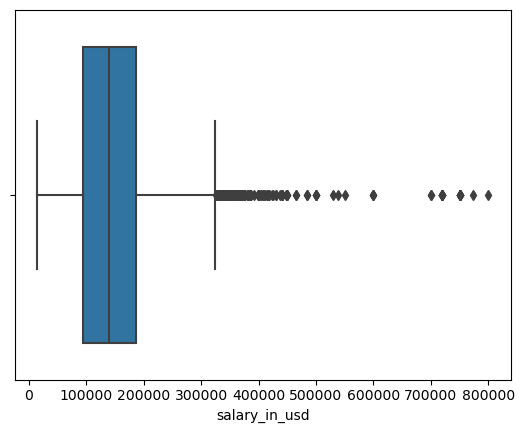

In [17]:
# Boxplot to detect salary outliers
sns.boxplot(x=df_no_dups['salary_in_usd'])

# Show the plot
plt.show()

A small number of individuals earn significantly more than the majority. The highest salary in the dataset is $800,000, which, although extremely high. These individuals should be investigated further. 
Are the highest salaries in executive and senior roles?

### Let's create a categorical plot to see whether the highest salary levels match experience level

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


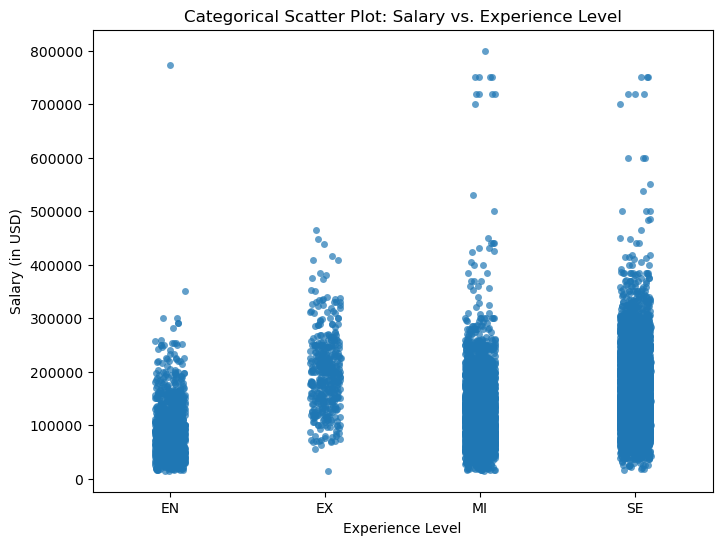

In [18]:
# Create a scatter plot with experience_level on x-axis and salary_in_usd on y-axis
plt.figure(figsize=(8, 6))
sns.stripplot(x='experience_level', y='salary_in_usd', data=df_no_dups, jitter=True, alpha=0.7)

# Labeling the plot
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.title('Categorical Scatter Plot: Salary vs. Experience Level')

# Show the plot
plt.show()

There are some extreme salary values in the Entry-level/Junior (EN), Mid-level/Intermediate (MI), and Senior (SE) experience levels. Notably, certain salaries in the EN and Executive (EX) categories seem unrealistic given the typical salary ranges for these levels. Additionally, for the Senior (SE) level, salaries exceeding 700,000 USD will be dropped as they are significantly higher than the majority of other salaries and likely represent outliers.

### Dropping the outliers in salary_in_usd

In [19]:
# Filter the rows where salary_in_usd is greater than 650,000
high_salary_df = df_no_dups[df_no_dups['salary_in_usd'] > 650000]

# Create a new DataFrame without salaries above 650,000 USD
df_salaries_filtered = df_no_dups[df_no_dups['salary_in_usd'] <= 650000]

# Display the shape of the new DataFrame to confirm
print(df_salaries_filtered.shape)

(10658, 11)


### Next, since it is not possible to compare the salaries in their original currency and we have the data for the USD conversion, I will drop the salary and salary_currency columns

In [20]:
# Drop the 'salary' and 'salary_currency' columns from df_salaries_filtered
df_salaries_filtered = df_salaries_filtered.drop(['salary', 'salary_currency'], axis=1)

# Display the first few rows to confirm the columns are dropped
print(df_salaries_filtered.head())

   work_year experience_level employment_type           job_title  \
0       2024               MI              FT  Analytics Engineer   
1       2024               SE              FT        AI Developer   
2       2024               SE              FT        AI Developer   
3       2024               MI              FT      Data Scientist   
4       2024               MI              FT      Data Scientist   

   salary_in_usd employee_residence  remote_ratio company_location  \
0          59615                 CA           100               CA   
1         252000                 US             0               US   
2         168000                 US             0               US   
3         199500                 US           100               US   
4          86700                 US           100               US   

  company_size  
0            S  
1            M  
2            M  
3            M  
4            M  


## 2.e. Checking the unique values for categorical columns


In [21]:
columns_to_check = ['job_title', 'employee_residence', 'company_location', 'company_size', 'experience_level']
unique_salaries_filtered = {col: df_salaries_filtered[col].unique() for col in columns_to_check}

for col, values in unique_salaries_filtered.items():
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(values)}")
    print("Unique values:")
    for value in values:
        print(f"  - {value}")


Column: job_title
Number of unique values: 143
Unique values:
  - Analytics Engineer
  - AI Developer
  - Data Scientist
  - Research Engineer
  - Research Scientist
  - Data Engineer
  - Data Analyst
  - Applied Scientist
  - Machine Learning Engineer
  - Data Architect
  - Business Intelligence Analyst
  - Research Analyst
  - Data Analytics Manager
  - Data Product Manager
  - Data Analytics Lead
  - Business Intelligence Engineer
  - Data Manager
  - Machine Learning Scientist
  - Prompt Engineer
  - Insight Analyst
  - BI Analyst
  - AI Engineer
  - Business Intelligence Lead
  - BI Developer
  - Data Operations Analyst
  - Data Reporting Analyst
  - Business Intelligence Developer
  - Data Product Owner
  - Data Specialist
  - Business Intelligence
  - MLOps Engineer
  - Data Visualization Specialist
  - AI Architect
  - Data Quality Analyst
  - Lead AI Engineer
  - AI Product Manager
  - Data Management Specialist
  - Data Strategist
  - AI Software Engineer
  - Computer Vision

### Note on Job Titles

Upon reviewing the job titles in the dataset, it's evident that the titles are very scattered and vary widely in format and terminology. For more effective analysis, these job titles can be grouped or standardized into broader categories (e.g., Data Scientists, Machine Learning Engineers, Business Intelligence roles) to reduce redundancy and improve the clarity of insights.

In [22]:
# Check for rows with the job title "Bear Robotics"
bear_robotics_rows = df_salaries_filtered[df_salaries_filtered['job_title'] == 'Bear Robotics']
print(bear_robotics_rows)

      work_year experience_level employment_type      job_title  \
2852       2024               MI              FT  Bear Robotics   
2853       2024               MI              FT  Bear Robotics   

      salary_in_usd employee_residence  remote_ratio company_location  \
2852         215000                 US             0               US   
2853         120000                 US             0               US   

     company_size  
2852            M  
2853            M  


Additionally, there is an unusual entry, "Bear Robotics," which appears to be a company name rather than a job title. This entry seems incorrect and should ideally be investigated to determine its origin and proper classification. However, for now, it will be left as is, since the two rows with the "Bear Robotics" job title contain other valuable information that may contribute to the analysis.

### Note on Company Location and Employee Residence

The dataset contains 88 unique values for `employee_residence` and 77 unique values for `company_location`. This difference in the number of unique codes suggests that employees may be working remotely from countries where the company does not have a physical office, which is common in global remote work environments. All country codes appear to be valid and correctly formatted according to the ISO 3166-1 alpha-2 standard. The discrepancy in unique values should be considered in the analysis, as it may reflect the geographic distribution of remote employees versus company office locations.

# 3. Exploratory Analysis

In [23]:
#Check the descriptive statistics for the cleaned data
df_salaries_filtered.describe()

,work_year,salary_in_usd,remote_ratio
count,10658.000000,10658.000000,10658.000000
mean,2023.278945,146558.036405,34.889285
std,0.783599,69283.705335,47.052485
min,2020.000000,15000.000000,0.000000
25%,2023.000000,95000.000000,0.000000
50%,2023.000000,139000.000000,0.000000
75%,2024.000000,187000.000000,100.000000
max,2024.000000,600000.000000,100.000000


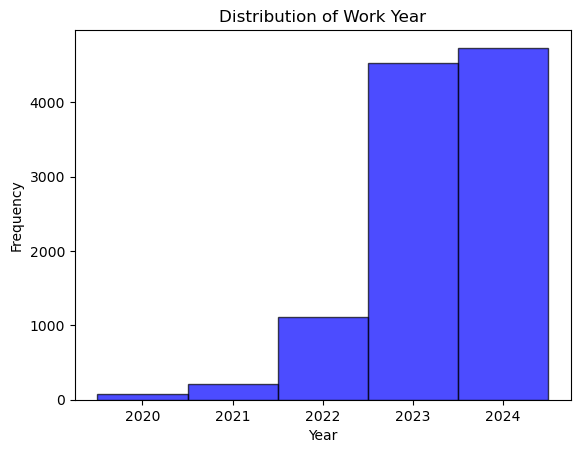

In [24]:
# Define the bins to correspond to the exact years
bins = [2019.5, 2020.5, 2021.5, 2022.5, 2023.5, 2024.5]

# Plot the histogram
plt.hist(df_salaries_filtered['work_year'], bins=bins, color='blue', alpha=0.7, edgecolor='black')

# Set the x-ticks to the specific years
plt.xticks([2020, 2021, 2022, 2023, 2024])

# Labeling
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Work Year')

# Show the plot
plt.show()

### Note on Work Year Distribution

The histogram of work years shows that most data points are concentrated around the more recent years, specifically 2023 and 2024. There is a noticeable underrepresentation of earlier years, particularly 2020 and 2021. This uneven distribution could make it challenging to compare trends over time, as the majority of data is skewed towards the later years. The concentration in the recent years suggests that the dataset may primarily reflect more current employment trends, with less insight into earlier periods.

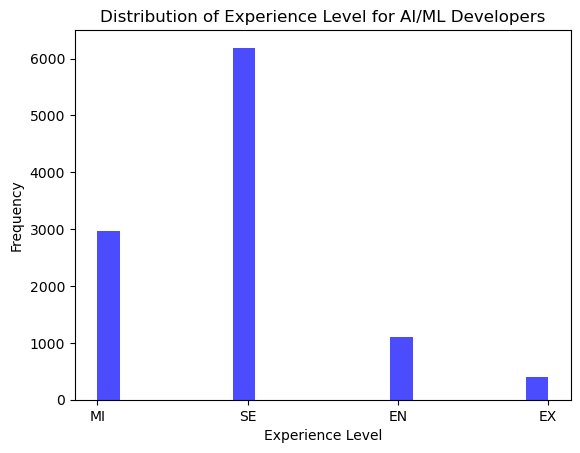

In [25]:
#Distribution of Experience Level
plt.hist(df_salaries_filtered['experience_level'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Experience Level')
plt.ylabel('Frequency')
plt.title('Distribution of Experience Level for AI/ML Developers')
plt.show()

### Note on Experience Level Distribution
The histogram of experience levels reveals a clear distribution pattern, with the majority of the data points falling into the Mid-level (MI) and Senior-level (SE) categories. In contrast, Entry-level (EN) positions are underrepresented with around 1,000 entries, and Executive-level (EX) positions are the least common, with fewer than 500 entries. This distribution suggests that the dataset is heavily skewed towards more experienced professionals, with fewer data points available for analyzing trends at the entry-level and executive-level positions. This imbalance may influence the overall analysis, as the experiences and salary trends for junior and executive roles are less represented.

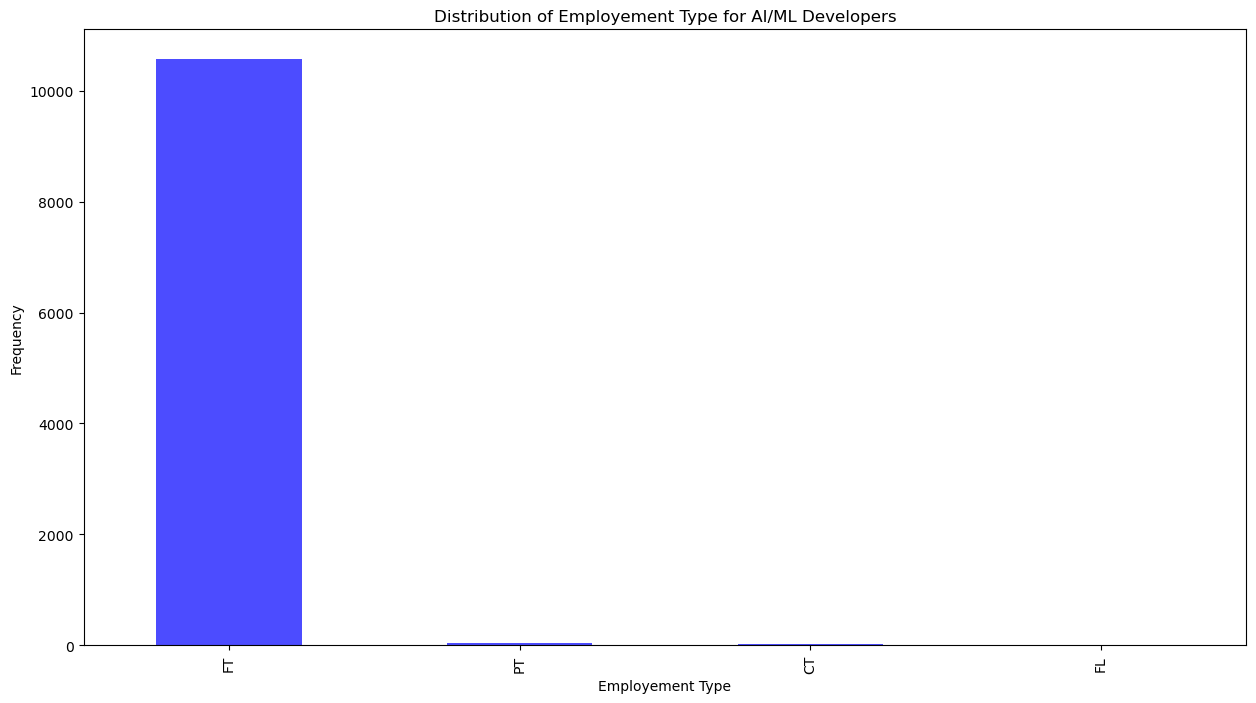

In [26]:
# Count the occurrences of employement type
employment_type_counts = df_salaries_filtered['employment_type'].value_counts()

# Plot the bar plot with rotated x-axis labels
plt.figure(figsize=(15, 8))
employment_type_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Employement Type')
plt.ylabel('Frequency')
plt.title('Distribution of Employement Type for AI/ML Developers')
plt.xticks(rotation=90)
plt.show()

### Note on Employement Type Distribution

The distribution of employment types in the dataset is heavily skewed towards full-time positions. With more than 10,000 entries, full-time roles dominate the dataset, making it difficult to discern the distribution of other employment types, such as part-time, contract, and freelance positions. This overwhelming representation of full-time employment may introduce a bias in the analysis, potentially masking trends and insights related to other forms of employment. The underrepresentation of part-time, contract, and freelance roles suggests that the dataset may not fully capture the diversity of employment arrangements in the industry, limiting the applicability of the findings to non-full-time work scenarios.

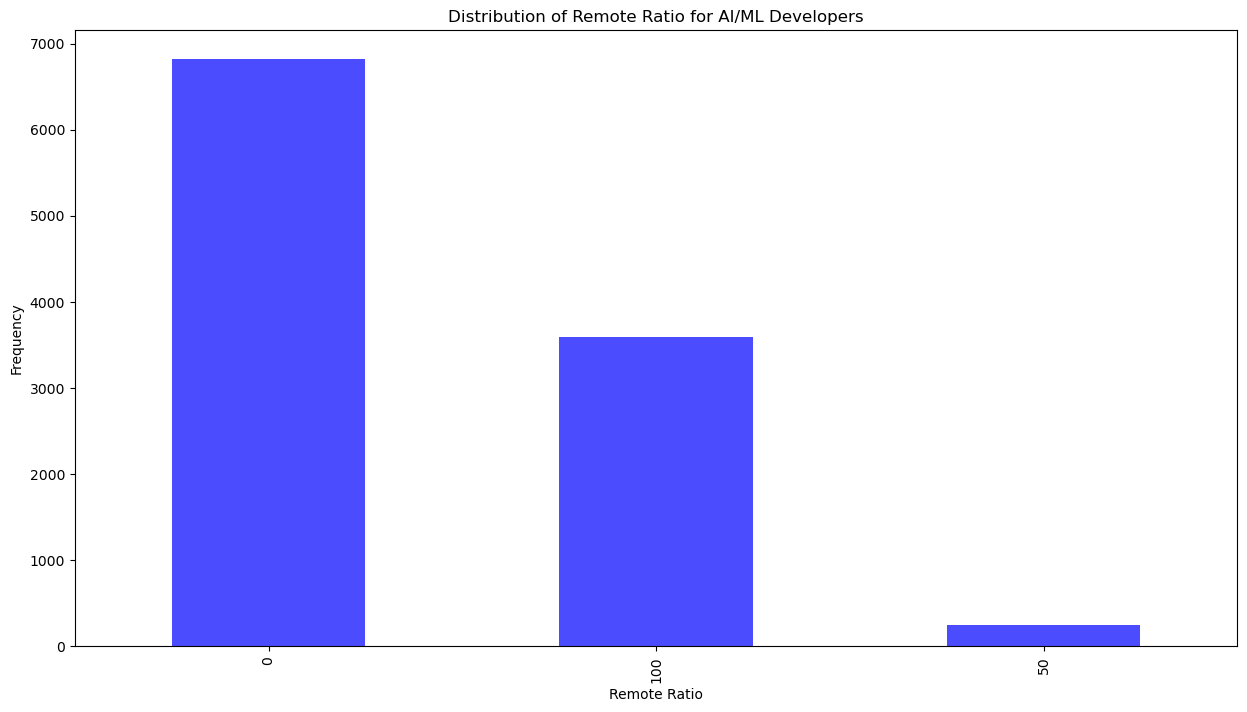

In [27]:
# Count the occurrences of remote ratio
remote_ratio_counts = df_salaries_filtered['remote_ratio'].value_counts()

# Plot the bar plot with rotated x-axis labels
plt.figure(figsize=(15, 8))
remote_ratio_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Remote Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Remote Ratio for AI/ML Developers')
plt.xticks(rotation=90)
plt.show()

### Note on Remote Ratio Distrubition

The majority of the dataset consists of employees working on-site, which could be an interesting trend to analyze over time. It would be valuable to compare the distribution between years to see if more companies have required employees to return to on-site work, particularly after 2023. The second largest group is fully remote employees (100% remote), though this group is about half the size of the on-site cohort. This shift in work patterns may reflect evolving company policies and employee preferences in recent years.

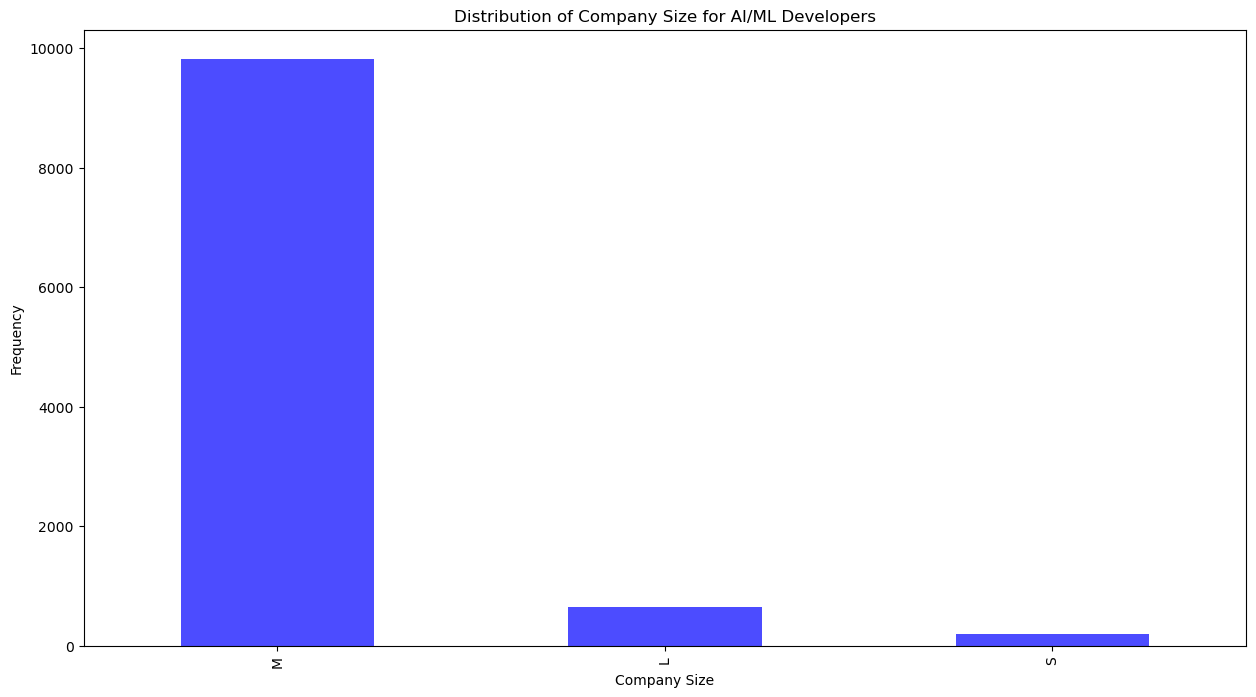

In [28]:
# Count the occurrences of company size
company_size_counts = df_salaries_filtered['company_size'].value_counts()

# Plot the bar plot with rotated x-axis labels
plt.figure(figsize=(15, 8))
company_size_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Company Size')
plt.ylabel('Frequency')
plt.title('Distribution of Company Size for AI/ML Developers')
plt.xticks(rotation=90)
plt.show()

### Note on Company Size Distribution

A large portion of data comes from medium size companies.

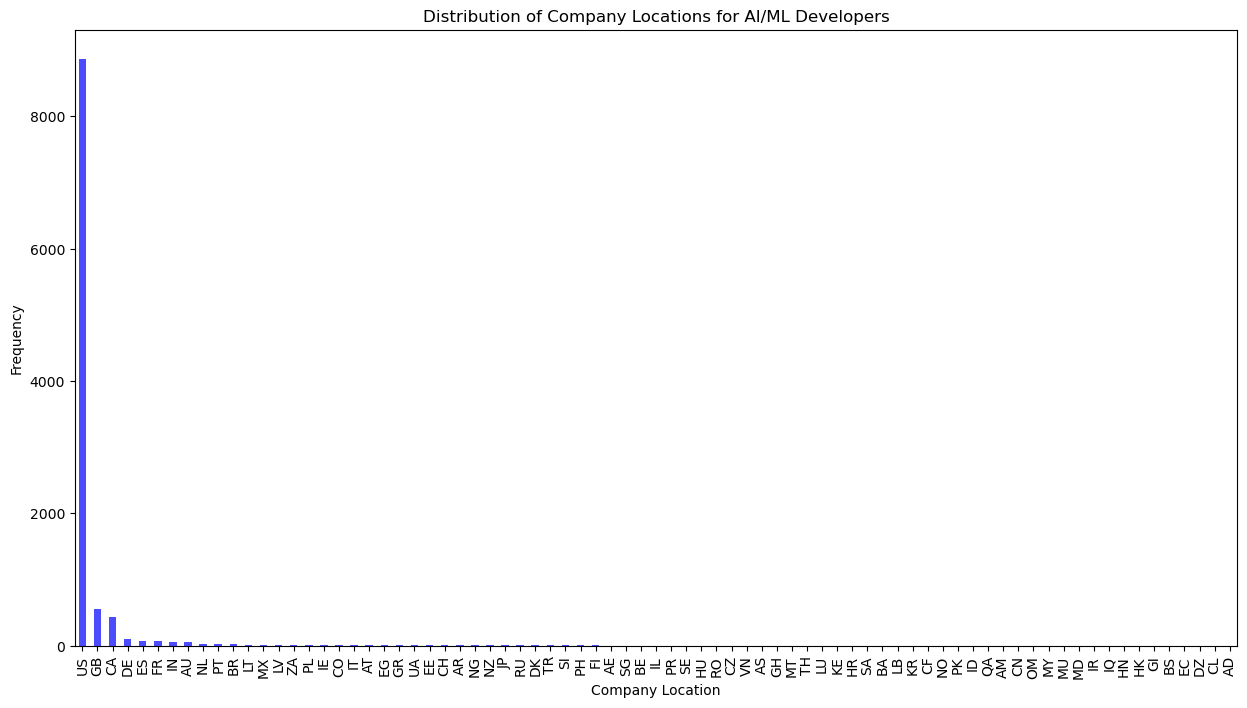

In [29]:
# Count the occurrences of each country
company_location_counts = df_salaries_filtered['company_location'].value_counts()

# Plot the bar plot with rotated x-axis labels
plt.figure(figsize=(15, 8))
company_location_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Company Location')
plt.ylabel('Frequency')
plt.title('Distribution of Company Locations for AI/ML Developers')
plt.xticks(rotation=90)
plt.show()

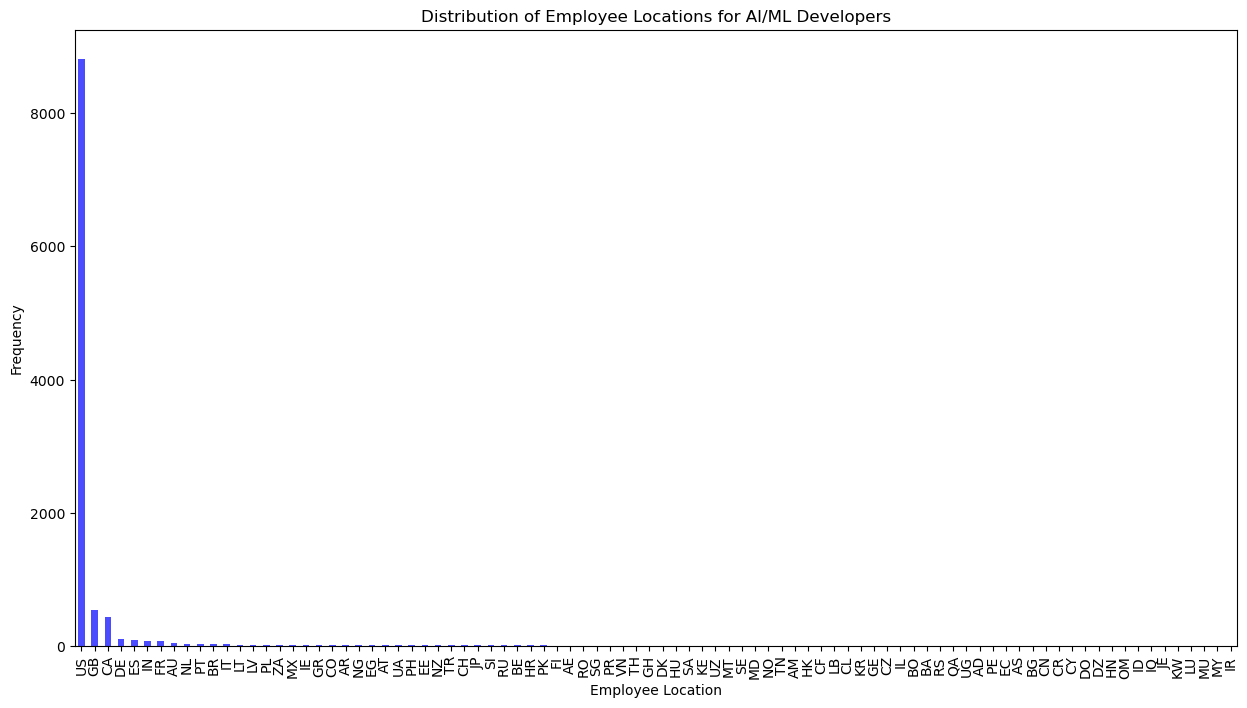

In [30]:
# Count the occurrences of each country
employee_residence_counts = df_salaries_filtered['employee_residence'].value_counts()

# Plot the bar plot with rotated x-axis labels
plt.figure(figsize=(15, 8))
employee_residence_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Employee Location')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Locations for AI/ML Developers')
plt.xticks(rotation=90)
plt.show()

### Note on Country Distribution

The distribution of both company and employee locations reveals a significant skew towards certain countries. The United States (US) is extremely overrepresented in the dataset, with more than 8,000 entries, dominating the distribution. The next most represented country is the United Kingdom (GB) and Canada (CA) with approximately 500 entries. This heavy concentration of data from the US may introduce a geographical bias, potentially skewing the analysis to reflect trends and conditions specific to the US, rather than providing a balanced global perspective. The underrepresentation of other countries suggests that the dataset may not fully capture the diversity of work environments and salary structures worldwide, limiting the generalizability of the findings to other regions.

# Exporting Data

In [31]:
#Export the cleaned dataframe
df_salaries_filtered.to_csv('/Users/buketoztekin/Documents/Cleaned_Salaries_Data.csv', index=False)
high_salary_df.to_csv('/Users/buketoztekin/Documents/High_salary_df.csv', index=False)